In [1]:
%pylab inline
%load_ext autoreload
%autoreload 2

import seaborn as sns
sns.set(color_codes=True)

import pandas as pd

Populating the interactive namespace from numpy and matplotlib


In [2]:
%ls

current_results.parquet/       results_for_iteration.parquet/
evaluation.twb                 results_visualization.ipynb
foo.csv


In [3]:
from pandas.io.json import json_normalize
df = pd.read_parquet("results_for_iteration.parquet")
dx = json_normalize(df.results)
dx['load'] = df.load
df= dx
df['results__key'] = df['key']
df['results__timing'] = df['timing']
df = df.drop(['key', 'timing'], axis=1)


df.load = df.load.astype(int)
df = df.sort_values(by=['load'], ascending=True)
df = df.reset_index(drop=True)
df['load (users)'] = df.load
df['time in secons (avg of 5 runs each)'] = df.results__timing
df['variant'] = df.results__key
df = df.drop(['load', 'results__timing', 'results__key'], axis=1)
df.head()

,load (users),time in secons (avg of 5 runs each),variant
0,2,4.627286,LocalityPreserving
1,2,6.710501,DistributedAlreadyExplodedNoLocalityPreservedO...
2,2,6.187336,DistributedAlreadyExplodedNoLocalityPreservedO...
3,2,14.238483,DistributedWithExplode
4,2,12.287865,DistributedWithExplode


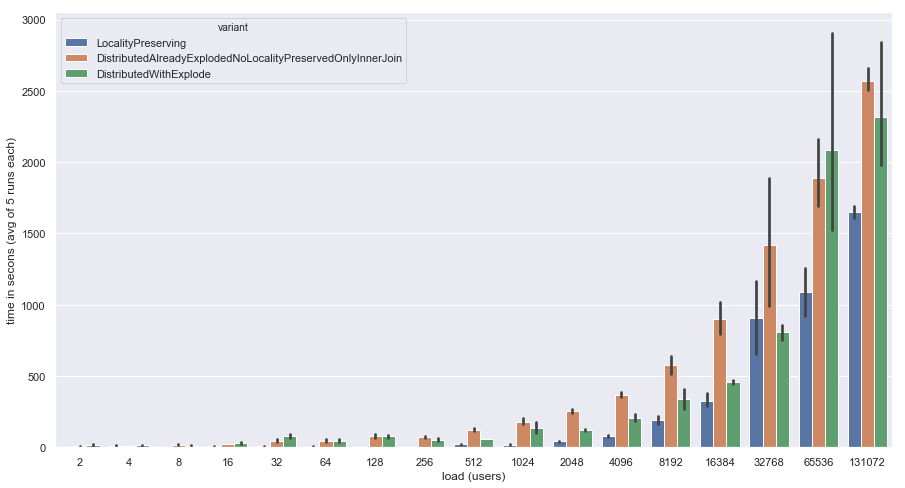

In [4]:
a4_dims = (15, 8)
fig, ax = pyplot.subplots(figsize=a4_dims)
df["log1p(time) in secons (avg of 5 runs each)"] = np.log1p(df["time in secons (avg of 5 runs each)"])
sns.barplot(x="load (users)", y="time in secons (avg of 5 runs each)", hue="variant", data=df)

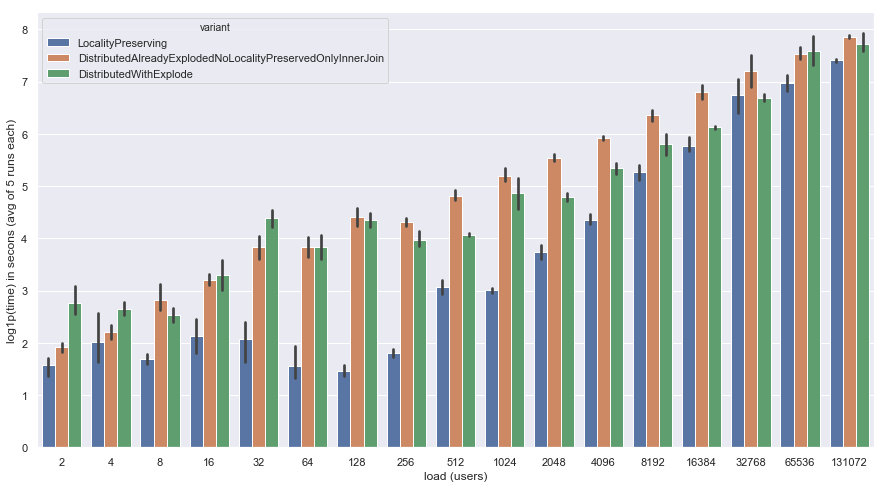

In [5]:
a4_dims = (15, 8)
fig, ax = pyplot.subplots(figsize=a4_dims)
sns.barplot(x="load (users)", y="log1p(time) in secons (avg of 5 runs each)", hue="variant", data=df)